# Convolutional Neural Network Workshop Demo
Implementing a `VGG-16` model with **[Keras](https://keras.io)** and **[Tensorflow](https://www.tensorflow.org)**

- **Objectives**
  - Implement a simple `VGG-16` CNN architecture
  - Use [MNIST](https://en.wikipedia.org/wiki/MNIST_database) (*Modified* National Institute of Standards and Technology) dataset, a large database of handwritten digits
  - Visualize feature maps and confusion matrix

- **Supplementary**
  - Additional implementation of an `AlexNet` and `Inception-v4`
  - Best practices used in creating layers

# 1. Importing Libraries and Loading the Dataset

- We will be using Tensorflow, an open-sourced end-to-end platform offering a library for various ML/DL tasks, and Keras, a high-level neural network library that runs on top of Tensorflow
- **Data Split**
    - There is no single "industry standard", but here are some general guidelines
        - `80/20` split: Often the starting point, with 80% of the data used for training and 20% for testing
        - `70/15/15` split: Allocates 70% for training, 15% for validation, and 15% for testing. This allows for hyperparameter tuning on the validation set before final evaluation
    - ***Note**
        - For very large datasets, even smaller splits (e.g., `95/5`) might be sufficient
        - More complex tasks may benefit from larger training sets (e.g., 70% or more)
        - Must always consider computational resources: training on larger datasets takes longer and requires more resources


In [1]:
"""
1. Importing Libraries and Loading the Dataset
"""

# import necessary libraries/dependencies
import tensorflow as tf
from tensorflow import keras
from keras import layers         # for building the model
import numpy as np               # for numerical operations
import seaborn as sns            # for data visualization
import matplotlib.pyplot as plt  # for data further visualization
from keras.datasets import mnist # for loading dataset
from tensorflow.keras.utils import to_categorical


# loading MNIST dataset -> train/test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

"""
    By default, mnist.load_data() allocates 60,000 samples
    for the training set and 10,000 for the test set
"""


11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


'\n    By default, mnist.load_data() allocates 60,000 samples\n    for the training set and 10,000 for the test set\n'

# 2. Data Preprocessing

- Some basic data preprocessing is always needed before feeding a dataset into a machine learning model
- In this case, we are doing simple operations on all the images, namely:
    - **Reshape the data:** By default, MNIST images are loaded with shape `(num_samples, 28, 28)`, representing the number of samples and 28x28 pixel size. However, CNNs in Keras expected an additional dimension that represents the channels of the image (e.g., 1 for grayscale or 3 for RGB). Since MNIST images are grayscale, there is only one channel
    - **Convert data to `float32`:** Image data is typically stored as integers (from 0 to 255 for 8-bit images), but it is common practice to convert these values to floats when processing them in neural networks to maintain precision during various transformations
    - **Normalize the data:** Normalization scales down the inputs features so they are between 0 and 1. For image data where pixel values range from 0 to 255, this can be achieved by dividing all pixel values by 255. `/= 255` will perform element-wise division of the arrays, effectively scaling the pixel values to fall within the **[0, 1]** range. This step is important because it helps the learning process converge faster and typically leads to better performance of the model



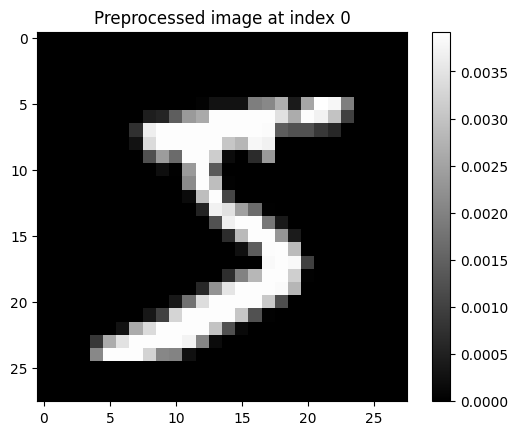

In [3]:
"""
2. Data Preprocessing
"""

## [RESHAPING TRAIN AND TEST DATA]

# reshape the data to add a channel dimension
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# convert the data to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalize the data
x_train /= 255
x_test /= 255

## [TRAINING AND TEST LABELS]

# categorical conversion for crossentropy (explained further on
y_train_cm = y_train
y_test_cm = y_test
y_train_req = to_categorical(y_train)
y_test_req = to_categorical(y_test)

## [VISUALIZATION]

# visualize a single preprocessed image from training set
plt.imshow(x_train[0].reshape(28, 28), cmap='gray')
plt.title(f'Preprocessed image at index 0')
plt.colorbar()  # optional: To show the color scale which represents pixel intensity values
plt.show()


# 3. Define the VGG-16 Architecture

- A VGG-16 (Visual Geometry Group) architecture is known for its neural network simplicity and the fact that it stacks multiple layers on top of each other with increase complexity
- Here is an explanation using the code below as a reference:
    - **Input layer:** Creates an input layer with the expected input shape be 28x28 pixels with a single channel (grayscale). The original/default VGG-16 takes 224x224x3 color images
    - **First set of Convolutional layers:** Two convolutional layers are applied with 64 filters each, a 3x3 kernel size, ReLU activation, and 'same' padding to maintain the spatial dimensions post-convolution. After these layers, a maxpooling layer reduced the spatial dimensions by half.
    - **Second/third/fourth/fifth set of convolutional layers:** The proceeding layers transform the different filters from 64, to 128, to 256, and finally 512 for the fourth and fifth layers.
    - **Fully connected layer:** After the fifth convolutional layer, a 1D array vector is created by flattening, and then three fully connected (dense) layers follow. The first two have 4096 units each with ReLU activation, and the final has 10 units (corresponding to the number of classes for classification), and uses softmax activation to output a probability distribution over the classes
- ***Note:** Usually, it is good practice to represent the model as an object, using Object-Oriented Programming (OOP)

In [ ]:
"""
3. Define VGG-16 Architecture [FULL]
"""

# define input layer
inputs = layers.Input(shape=(28, 28, 1))

# add the first set of convolutional layers
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPool2D((2, 2))(x)

# add the second set of convolutional layers
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPool2D((2, 2))(x)

# add the third set of convolutional layers
x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPool2D((2, 2))(x)

# add the fourth set of convolutional layers
x = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPool2D((2, 2))(x)

# add the fifth set of convolutional layers
x = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
# cannot apply fifth set of MaxPooling -> already 1x1 feature map, therefore not possible

# add the fully connected layers
x = layers.Flatten()(x)
x = layers.Dense(4096, activation='relu')(x)
x = layers.Dense(4096, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)

# define the model
model = keras.Model(inputs, outputs)


In [4]:
"""
3. Define VGG-16 Architecture [DEMO (shorter training time)]
"""

# define input layer
inputs = layers.Input(shape=(28, 28, 1))

# zero padding
x = layers.ZeroPadding2D(padding=(2, 2))(inputs)

# add the first set of convolutional layers
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', strides=1)(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', strides=1)(x)
x = layers.MaxPool2D((2, 2), strides=2)(x)

# add the second set of convolutional layers
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', strides=1)(x)
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', strides=1)(x)
x = layers.MaxPool2D((2, 2), strides=2)(x)

# add the third set of convolutional layers
x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', strides=1)(x)
x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', strides=1)(x)
x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', strides=1)(x)
x = layers.MaxPool2D((2, 2), strides=2)(x)

# add the fully connected layers
x = layers.Flatten()(x)
x = layers.Dense(4096, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)

# define the model
model = keras.Model(inputs, outputs)


# 4. Compile and Train the Model

- After defining the model, one has to compile and train the actual model with data. Here are the steps necessary for the `VGG-16` network:
    - `model.compile()` configures the model for training by defining the optimizer, loss function, and metrics
        - `optimizer='adam'`: The optimizer 'adam' is chosen to update the weights of the network during training. Adam is an adaptive learning rate optimization algorithm designed to handle sparse gradients on noisy problems
        - `loss='sparse_categorical_crossentropy'`: The loss function, which is used when there are two or more label classes. We expect labels to be provided as integers (if you have one-hot encoded your labels, use `categorical_crossentropy` instead). It measures the differece between the predicted probabilities and the true distribution of the labels
        - `metrics=['accuracy']`: Metrics are used to monitor the training and testing steps. 'Accuracy' is used here to calculate how often predictions equal labels
    - `model.fit()`: This method trains the model for a fixed number epochs (iterations on a dataset). `validation_data` is also passed into the model. This allows us to evaluate the performance of the model after every epoch on a different set of data that it has not seen during training, helping in detecting issues like overfitting. Moreover, `batch_size` specificies the number of samples per gradient update. Rather than updating the model weights after every single sample, 128 samples are propagated through the network before performing a weight update
    - `history`: The `fit()` method returns a History object. It is a record of training loss values and metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable)

In [ ]:
"""
4. Compile and Train the Model
"""

# different optimizer used in demo: Stochastic Gradient Descent (SGD)
from tensorflow.keras.optimizers import SGD

# compile the model
opt = SGD(lr=1e-4, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# train the model
history = model.fit(x_train, y_train_req, epochs=15, validation_split=0.1, batch_size=32)


Epoch 1/15
  30/1688 [..............................] - ETA: 30:38 - loss: 2.3027 - accuracy: 0.0896

# 5. Visualize Training Results

- Now we can use Seaborn library, which is a data visualization library built on top of Matplotlib, to plot the training accuracy and loss curves of a machine learning model
    - `sns.lineplot()`: This function creates a line chart using the Seaborn library, which takes in the `history.history` data source. The x-axis is the total epochs (cycles), and the y-axis is the 'accuracy' values from the `history.history`

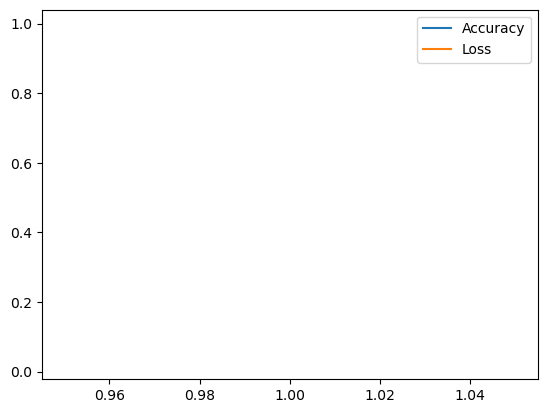

In [ ]:
"""
5. Visualize Training Results
"""

# extract the number of epochs from the length of one of the metrics
epochs = range(1, len(history.history['accuracy']) + 1)

# Plot the accuracy curve
sns.lineplot(x=epochs, y=history.history['accuracy'], label='Accuracy')

# Plot the loss curve
sns.lineplot(x=epochs, y=history.history['loss'], label='Loss')

# display the legend and show the plot
plt.legend()
plt.show()


# 6. Evaluate the Model

- The last step in a training a CNN consists of evaluating the performance of a trained machine learning model
    - `model.evaluate()`: This method evaluates how the model performs on a given dataset. It returns metrics that were specificed during the compilcation of the model (e.g., loss and accuracy)
    - The evluation process computes the loss value (a measure of error or discrepancy between predicted and actual values) and the accuracy (the proporition of correct predictions) of the model when making predictions on `x_test`

In [ ]:
"""
6. Evaluate the Model
"""

# evaluate the model
loss, accuracy = model.evaluate(x_test, y_test_req, verbose=2)

print(f"Loss: {loss}; Accuracy: {accuracy}")


313/313 - 10s - loss: 0.0285 - accuracy: 0.9904 - 10s/epoch - 33ms/step
Loss: 0.028535719960927963; Accuracy: 0.9904000163078308


# Miscellaneous Visualizations

- Once the model is evaluated, you can play around with it, namely, we will do the following:
    - **Miscellaneous 1:** Shows feature maps by taking the first 10 examples from `x_test` via list slicing (`[:10]`), generating their predictions using `model.predict()`, and then visualizing their feature maps by creating a heatmap
        - It does so by creating a heatmap visualization of the feature map weights, and retrieves the weights from the second layer of the model using `get_weights()`. `[:, :, 0, i]` seems complicated, but all it is doing is extracting the **i-th** feature map
        - Finally, it is plotted using `matplotlib.pyplot` using `plt.show()`
    - **Miscellaneous 2:** This visualization is based on confusion matrix, an incredibly useful visualization which takes on a table layout, and allows visualization of the performance of an algorithm
        - It takes the true labels (`y_test`) and predicted labels (`y_pred`) as arguments
        - It then uses, once again, a heatmap functionality to create a graphical representation of the confusion matrix. `annot=True` refers to the annotation of the heatmap with the numerical values from the confusion matrix

In [ ]:
"""
Miscellaneous 1: show feature maps
"""

# generate sample input data assuming x_test is already defined and preprocessed
sample_data = x_test[:10]

# define a new model that takes the input of the original model and outputs the activations
layer_outputs = [layer.output for layer in model.layers]
activation_model = model

# generate feature maps (activations)
activations = activation_model.predict(sample_data)

# assuming that the first layer is a convolutional layer and visualize its feature maps
first_layer_activation = activations[0] # Get the activations of the first layer

# visualize each feature map separately
for i in range(10):
    # Assuming there is at least one channel to visualize and the i-th filter has a channel
    feature_map = first_layer_activation[0, :, :, i]

    sns.heatmap(feature_map, cmap='jet')
    plt.title(f"Layer 1; Feature Map {i+1}")
    plt.show()


1/1 [==============================] - 0s 31ms/step


IndexError: too many indices for array: array is 1-dimensional, but 4 were indexed

In [ ]:
"""
Miscellaneous 2: visualize confusion matrix
"""

# generate confusion matrix
y_pred = model.predict_classes(x_test)
conf_matrix = tf.math.confusion_matrix(y_true=y_test, y_pred=y_pred)

# visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


AttributeError: 'Functional' object has no attribute 'predict_classes'

# Other Architectures: AlexNet & Inception-v4 Networks

- Below this cell, you can see two alternative architectures talked about during the workshop: an AlexNet (developed by SuperVision group—Alex Krizhevsky, Geoffrey Hinton, Ilya Sutskever), and an GoogleLeNet/Inception-v4 (developed by Google)
- **Instructions:**: To use an alternative architecture, simply replace the `3. Define VGG-16 Architecture` with the corresponding architecture


In [ ]:
"""
    AlexNet — SuperVision group
"""

class AlexNetModel(tf.keras.Model):

    def __init__(self, num_classes=10):
        super(AlexNetModel, self).__init__()

        # define the input layer
        self.inputs = layers.InputLayer(input_shape=(28, 28, 1))

        # add first convolutional layer
        self.conv1 = layers.Conv2D(filters=96, kernel_size=(11, 11), strides=(4, 4),
                                   activation='relu', padding='same')

        # add max pooling layer
        self.maxpool1 = layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2))

        # add second convolutional layer
        self.conv2 = layers.Conv2D(filters=256, kernel_size=(5, 5),
                                   activation='relu', padding='same')

        # add max pooling layer
        self.maxpool2 = layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2))

        # add third convolutional layer
        self.conv3 = layers.Conv2D(filters=384, kernel_size=(3, 3),
                                   activation='relu', padding='same')

        # add fourth convolutional layer
        self.conv4 = layers.Conv2D(filters=384, kernel_size=(3, 3),
                                   activation='relu', padding='same')

        # add fifth convolutional layer
        self.conv5 = layers.Conv2D(filters=256, kernel_size=(3, 3),
                                   activation='relu', padding='same')

        # flatten the convolutions
        self.flatten = layers.Flatten()

        # add first fully connected layer with dropout
        self.fc1 = layers.Dense(4096, activation='relu')
        self.dropout1 = layers.Dropout(0.5)

        # add second fully connected layer with dropout
        self.fc2 = layers.Dense(4096, activation='relu')
        self.dropout2 = layers.Dropout(0.5)

        # output layer with `num_classes` units (number of classes)
        self.outputs = layers.Dense(num_classes, activation='softmax')

    def call(self, x):
        # forward pass through the network
        x = self.inputs(x)
        x = self.conv1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.maxpool2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.dropout2(x)

        return self.outputs(x)

# instantiate the model
num_classes = 10  # number of output units/classes (specific to MNIST dataset, 10 possibilities)
model_alexnet = AlexNetModel(num_classes=num_classes)

# build the model by passing a batch of inputs
model_alexnet.build(input_shape=(None, 28, 28, 1))
model_alexnet.summary() # print out model summary

In [ ]:
"""
    GoogleLeNet / Inception-v4
"""

class InceptionModule(tf.keras.layers.Layer):

    def __init__(self, filter_b1, filter_b2_reduce, filter_b2,
                 filter_b3_reduce, filter_b3, filter_b4):

        """
        Inception module with four branches
        """

        super(InceptionModule, self).__init__()

        # branch 1: Single 1x1 convolutional layer
        self.branch1 = layers.Conv2D(filters=filter_b1, kernel_size=(1, 1), activation='relu', padding='same')

        # branch 2: 1x1 conv followed by 3x3 conv
        self.branch2_part1 = layers.Conv2D(filters=filter_b2_reduce, kernel_size=(1, 1), activation='relu', padding='same')
        self.branch2_part2 = layers.Conv2D(filters=filter_b2, kernel_size=(3, 3), activation='relu', padding='same')

        # branch 3: 1x1 conv followed by 5x5 conv
        self.branch3_part1 = layers.Conv2D(filters=filter_b3_reduce, kernel_size=(1, 1), activation='relu', padding='same')
        self.branch3_part2 = layers.Conv2D(filters=filter_b3, kernel_size=(5, 5), activation='relu', padding='same')

        # branch 4: MaxPooling followed by a 1x1 conv
        self.branch4_part1 = layers.MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')
        self.branch4_part2 = layers.Conv2D(filters=filter_b4, kernel_size=(1, 1), activation='relu', padding='same')

    def call(self, inputs):
        branch1 = self.branch1(inputs)
        branch2 = self.branch2_part2(self.branch2_part1(inputs))
        branch3 = self.branch3_part2(self.branch3_part1(inputs))
        branch4 = self.branch4_part2(self.branch4_part1(inputs))

        # concatenates branches
        return tf.concat([branch1, branch2, branch3, branch4], axis=-1)

# defining the GoogleLeNet/Inception-v4 model
class GoogleLeNetModel(tf.keras.Model):

    def __init__(self, num_classes=10):
        super(GoogleLeNetModel, self).__init__()

        # initial set of conv + maxpool to reduce dimensions
        self.conv1 = layers.Conv2D(64, (7, 7), strides=(2, 2), activation='relu', padding='same')
        self.maxpool1 = layers.MaxPooling2D((3, 3), strides=(2, 2))

        # local response normalization could be added here (omitted for simplicity)

        # inception modules
        self.inception1 = InceptionModule(filter_b1=32, filter_b2_reduce=48, filter_b2=64,
                                          filter_b3_reduce=8, filter_b3=16, filter_b4=16)

        # additional inception module(s) can be added here!

        # finishing layers - Classifier
        self.avgpool = layers.GlobalAveragePooling2D()
        self.flatten = layers.Flatten()
        self.dropout = layers.Dropout(0.4)
        self.fc = layers.Dense(num_classes, activation='softmax')

    def call(self, x):
        # forward pass through the network
        x = self.conv1(x)
        x = self.maxpool1(x)
        x = self.inception1(x)

        # additional inception layers would be processed here!

        x = self.avgpool(x)
        x = self.flatten(x)
        x = self.dropout(x)
        return self.fc(x)

# instantiate the model
num_classes = 10  # number of output units/classes
model_inception = GoogleLeNetModel(num_classes=num_classes)

# build the model by passing a batch of inputs
model_inception.build(input_shape=(None, 28, 28, 1))
model_inception.summary() # print out model summary